Complete notebook available at: https://github.com/ai4up/ufo-prediction/blob/main/demo/demo.ipynb

## Motivation

Building attributes such as building height, type, and construction year are not available for all buildings in EUBUCCO. However, for many prospective use cases of the dataset, such as energy modeling, the building attributes are of high importance. This notebook shows how the available building footprints can be used to estimate missing building attributes with supervised machine learning.

In [ ]:
# -.-|m { input: false }

!pip install -r ../requirements.txt

In [1]:
# -.-|m { input: false }

# standard libs
import os
import sys
import logging

# project lib
PROJECT_SRC_PATH = os.path.join( '/workspace/workspace/ufo-prediction', 'src')
sys.path.append(PROJECT_SRC_PATH)

import visualizations
from prediction_age import AgePredictor, AgeClassifier, AgePredictorComparison
import preprocessing as pp
import dataset

# external libs
import numpy as np
import pandas as pd
import geopandas as gpd
from xgboost import XGBRegressor, XGBClassifier
import xgboost as xgb

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-9z3i5z1b because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# -.-|m { input: false }

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO)

## Data

Demo sample of ~20k buildings for Spain, ~50k for France, and 170k for the Netherlands. All 117 urban form features, lat lon, as well as some auxiliary attributes like city name, neighborhood, building type, etc. are included.

The demo samples are stored using Git Large File Storage (LFS). To download them explicitly use:

In [3]:
#!git lfs pull

batch response: This repository is over its data quota. Account responsible for LFS bandwidth should purchase more data packs to restore access.
Failed to fetch some objects from 'https://github.com/kaifoerster/ufo-prediction.git/info/lfs'


In [3]:
# When loading ufo data
#DATA_DIR = '.'
current_directory = os.getcwd()
print(current_directory)

path_data_NLD = os.path.join('/workspace/workspace/ufo-prediction', 'demo', 'df-NLD.pkl')
path_data_FRA = os.path.join('/workspace/workspace/ufo-prediction', 'demo', 'df-FRA.pkl')
path_data_ESP = os.path.join('/workspace/workspace/ufo-prediction', 'demo', 'df-ESP.pkl')
print(path_data_NLD)



/workspace
/workspace/workspace/ufo-prediction/demo/df-NLD.pkl


In [4]:
df = pd.read_pickle(path_data_NLD)

In [3]:
# When loading RCA data
#path_data_RCA = os.path.join(dataset.DATA_DIR, 'RCA_subset.csv')
#df = pd.read_csv(path_data_RCA, encoding='latin1')

## Prediction

In [18]:
xgb_model_params = {'tree_method': 'hist', 
                    # 'n_estimators': 500
                    }
xgb_hyperparams = {
    'max_depth': 5,
    'learning_rate': 0.1,
    'n_estimators': 500,
    'colsample_bytree': 0.5,
    'subsample': 1.0,
}

### Regression

2024-01-17 14:07:36,892 | INFO : Dataset length: 6254807
2024-01-17 14:07:36,897 | INFO : Dataset allocated memory: 6489 MB
2024-01-17 14:07:49,405 | INFO : No abort signal received. Continuing... To abort please create /p/projects/eubucco/data/3-ml-inputs/local-cd6f5353.abort.
2024-01-17 14:07:49,436 | INFO : Dataset standard deviation: 50.47579842972588
2024-01-17 14:07:49,445 | INFO : Dataset mean age: 1967.9264317827872
2024-01-17 14:07:49,446 | INFO : Training dataset length: 5003845
2024-01-17 14:07:49,447 | INFO : Test dataset length: 1250962
2024-01-17 14:08:14,583 | INFO : Test dataset standard deviation after preprocessing: 25.94270798816907
2024-01-17 14:08:14,586 | INFO : Test dataset mean age after preprocessing: 1972.8946623413947
2024-01-17 14:08:14,586 | INFO : Training dataset length after preprocessing: 4843733
2024-01-17 14:08:14,587 | INFO : Test dataset length after preprocessing: 1210868
`early_stopping_rounds` in `fit` method is deprecated for better compatibilit

MAE: 13.69 y
RMSE: 19.03 y
R2: 0.4618


2024-01-17 14:09:50,832 | ERROR : Failed to calculate energy error: [Errno 2] No such file or directory: '/p/projects/eubucco/data/3-ml-inputs/TABULA_heating_demand.csv'


R2: nan
MAPE: nan


invalid value encountered in divide


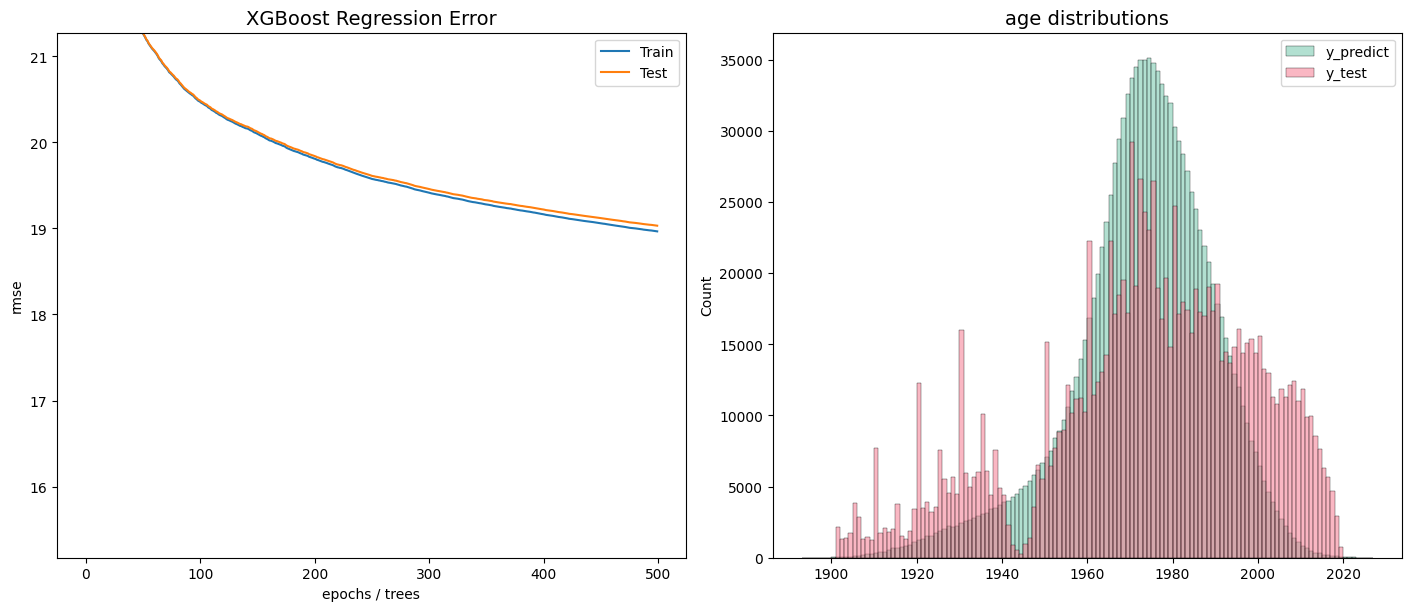

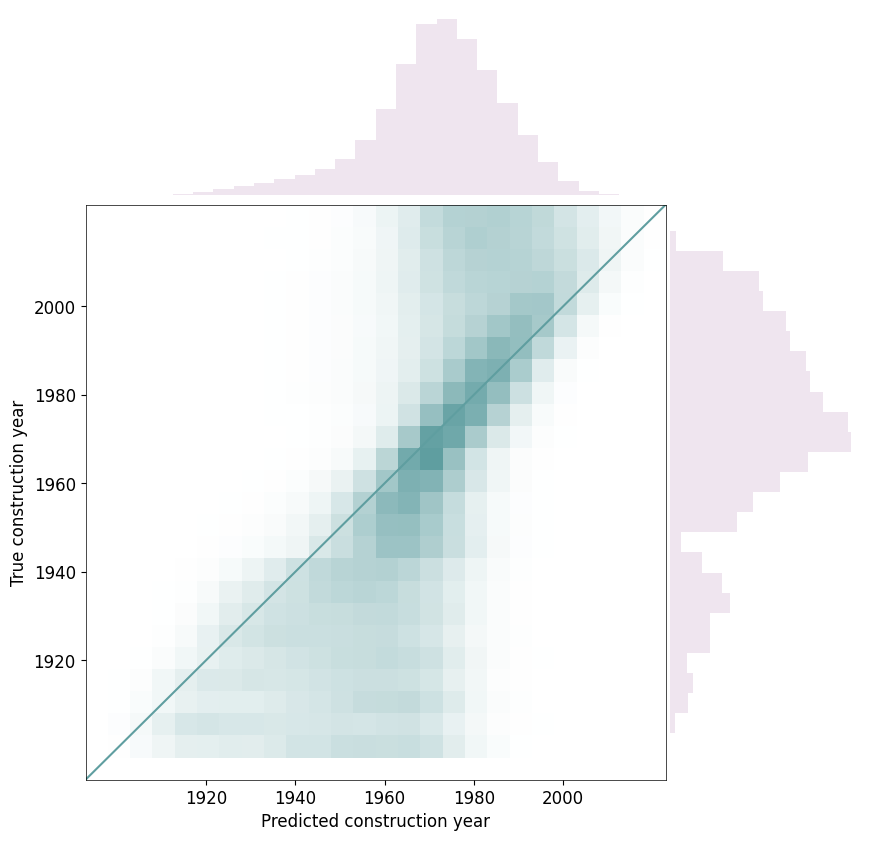

In [19]:
predictor = AgePredictor(
    model=XGBRegressor(**xgb_model_params),
    df=df,
    test_training_split=pp.split_80_20,
    # cross_validation_split=pp.cross_validation,
    early_stopping=True,
    hyperparameters=xgb_hyperparams,
    # preprocessing_stages=[pp.remove_outliers, pp.categorical_to_int_byList, pp.convert_to_double_byList]
    preprocessing_stages=[pp.remove_outliers]
)

predictor.evaluate()


### Classification

2024-01-17 14:10:13,491 | INFO : Generated bins: [1900, 1965, 1975, 1992, 2006, 2015, 2022]
2024-01-17 14:10:13,493 | INFO : Generated bins with the following labels: ['1900-1964', '1965-1974', '1975-1991', '1992-2005', '2006-2014', '2015-2021']
2024-01-17 14:10:19,217 | INFO : Dataset length: 6254807
2024-01-17 14:10:19,222 | INFO : Dataset allocated memory: 6489 MB
2024-01-17 14:10:31,788 | INFO : No abort signal received. Continuing... To abort please create /p/projects/eubucco/data/3-ml-inputs/local-8705f856.abort.
2024-01-17 14:10:31,789 | INFO : Training dataset length: 5003845
2024-01-17 14:10:31,790 | INFO : Test dataset length: 1250962
2024-01-17 14:10:31,849 | INFO : Test cities: ['De Bilt' 'Overbetuwe' 'Eindhoven' 'Eibergen' 'Rotterdam' 'Vlagtwedde'
 'Purmerend' 'Velsen' 'Borger-Odoorn' 'Enschede' 'Papendrecht'
 'Maastricht' 'Amstelveen' 'Raalte' 'Almere' 'Veere' 'Tilburg'
 'Amersfoort' 'Midden-Drenthe' 'Reeuwijk' 'Sneek' 'Goedereede'
 "'s-Gravenhage" 'Epe' 'Gaasterlân-Sleat

Classification report:
               precision    recall  f1-score  support
1900-1964      0.738970  0.690861  0.714106   372379
1965-1974      0.639229  0.659675  0.649291   216913
1975-1991      0.805434  0.556949  0.658531   312361
1992-2005      0.642513  0.527493  0.579350   194156
2006-2014      0.356738  0.487598  0.412028    94705
2015-2021      0.112621  0.741672  0.195548    20354
accuracy       0.609491  0.609491  0.609491        0
macro avg      0.549251  0.610708  0.534809  1210868
weighted avg   0.682358  0.609491  0.634208  1210868
Cohen’s kappa: 0.5125
Matthews correlation coefficient (MCC): 0.5182


FixedFormatter should only be used together with FixedLocator


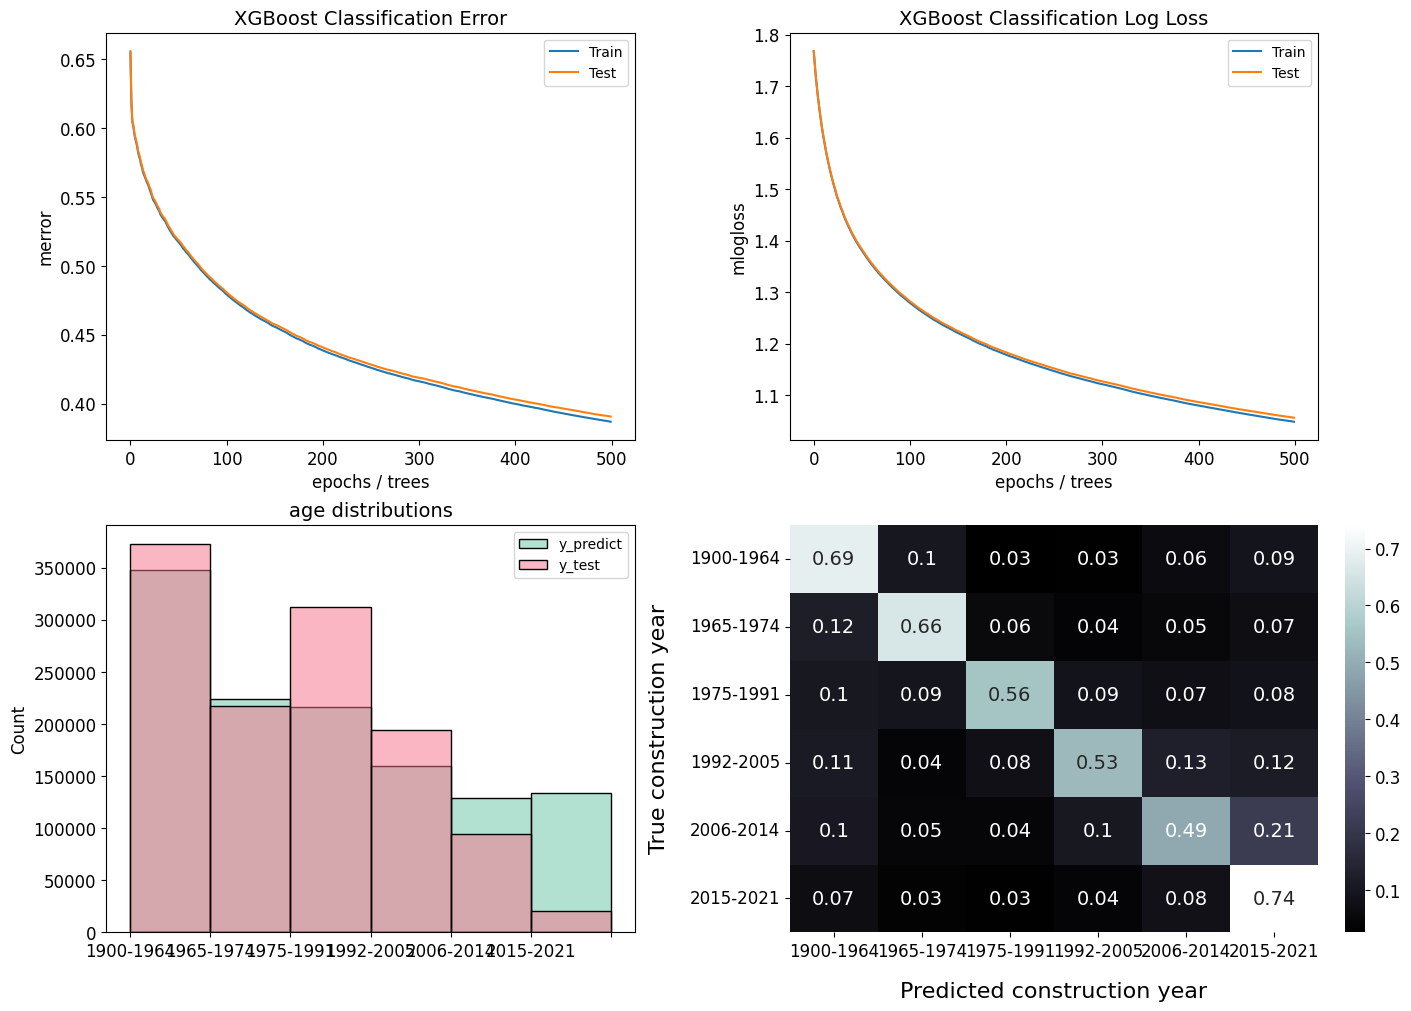

In [20]:
tabula_nl_bins = [1900, 1965, 1975, 1992, 2006, 2015, 2022]
equally_sized_bins = (1900, 2020, 10)

classifier = AgeClassifier(
    model=XGBClassifier(**xgb_model_params),
    df=df,
    test_training_split=pp.split_80_20,
    # cross_validation_split=pp.cross_validation,
    preprocessing_stages=[pp.remove_outliers],
    hyperparameters=xgb_hyperparams,
    mitigate_class_imbalance=True,
    # bin_config=equally_sized_bins,
    bins=tabula_nl_bins,
)
classifier.evaluate()

### Country and generalization comparison

The `AgePredictorComparison` faciliates comparisons between differently configured training runs, for example to compare the prediction performance between countries, cross-validation strategies, oversampling strategies or any other preprocessing steps.

In [21]:
comparison_config = {
    'Spain': {'df': path_data_ESP},
    'France': {'df': path_data_FRA},
    'Netherlands': {'df': path_data_NLD},
}

grid_comparison_config = {
    'random-cv': {'cross_validation_split': pp.cross_validation},
    'neighborhood-cv': {'cross_validation_split': pp.neighborhood_cross_validation},
    'city-cv': {'cross_validation_split': pp.city_cross_validation},
}

comparison = AgePredictorComparison(
    exp_name='demo',
    model=XGBRegressor(**xgb_model_params),
    df=None,
    frac=0.5,
    cross_validation_split=None,
    preprocessing_stages=[pp.remove_outliers],
    hyperparameters=xgb_hyperparams,
    compare_feature_importance=False,
    compare_classification_error=False,
    include_baseline=False,
    save_results=False,
    garbage_collect_after_training=True,
    comparison_config=comparison_config,
    grid_comparison_config=grid_comparison_config,
)

results = comparison.evaluate()

2024-01-17 14:50:47,195 | INFO : Starting experiment Spain_random-cv...


2024-01-17 14:53:18,314 | INFO : Dataset length: 4226188
2024-01-17 14:53:18,319 | INFO : Dataset allocated memory: 4385 MB
2024-01-17 14:53:20,237 | INFO : No abort signal received. Continuing... To abort please create /p/projects/eubucco/data/3-ml-inputs/local-33f2404e.abort.
2024-01-17 14:53:20,256 | INFO : Dataset standard deviation: 48.35942318636823
2024-01-17 14:53:20,263 | INFO : Dataset mean age: 1971.7313162594755
2024-01-17 14:53:20,264 | INFO : Training dataset length: 3380950
2024-01-17 14:53:20,264 | INFO : Test dataset length: 845238
2024-01-17 14:53:33,818 | INFO : Test dataset standard deviation after preprocessing: 25.909066171213233
2024-01-17 14:53:33,820 | INFO : Test dataset mean age after preprocessing: 1980.6306878251494
2024-01-17 14:53:33,821 | INFO : Training dataset length after preprocessing: 3058384
2024-01-17 14:53:33,821 | INFO : Test dataset length after preprocessing: 764264
`early_stopping_rounds` in `fit` method is deprecated for better compatibility

FileNotFoundError: [Errno 2] No such file or directory: '/workspace/workspace/ufo-prediction/demo/df-FRA.pkl'

In [ ]:
results

,name,R2,R2_std,MAE,MAE_std,RMSE,RMSE_std,within_5_years,within_10_years,within_20_years,R2_seed_0
8,Netherlands_city-cv,0.135401,0.0,18.030643,0.0,23.598668,0.0,0.221385,0.392977,0.638903,0.135401
7,France_city-cv,0.187767,0.0,18.645831,0.0,23.772030,0.0,0.176875,0.345911,0.615315,0.187767
6,Spain_city-cv,0.197072,0.0,23.840955,0.0,29.563272,0.0,0.126411,0.247178,0.494357,0.197072
3,Spain_neighborhood-cv,0.198503,0.0,23.779078,0.0,29.536916,0.0,0.129797,0.247178,0.506772,0.198503
5,Netherlands_neighborhood-cv,0.304538,0.0,15.884060,0.0,21.164937,0.0,0.241489,0.444702,0.699700,0.304538
4,France_neighborhood-cv,0.330228,0.0,16.306574,0.0,21.586864,0.0,0.211348,0.408337,0.705209,0.330228
0,Spain_random-cv,0.363164,0.0,20.108252,0.0,26.328608,0.0,0.180587,0.355530,0.592551,0.363164
1,France_random-cv,0.511105,0.0,12.372172,0.0,18.443089,0.0,0.369564,0.593466,0.806340,0.511105
2,Netherlands_random-cv,0.575725,0.0,10.203823,0.0,16.531180,0.0,0.525335,0.695626,0.827052,0.575725
